# Large dimension issues
In this labwork, we will address two large dimension problem. Here the number of variables of optimization will be very high and we will have to adapt our algorithms. We first begin with some imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.misc as spm

## Working with images

A gray-scale image is a $2d$-array of numbers. If the shape of an image is $(n_x,n_y)$, a gray-scale image $I=(I_{ij})$ has coefficient between $0$ (black) and $255$ (white). In the code below, we load two images that are stored in `Image1` and `Image2`.

In [2]:
Image1 = spm.face(gray=True)
Image2 = spm.ascent()
Image1 = Image1.astype('float64')  # make sure that the pixel values are floating point numbers
Image2 = Image2.astype('float64')
print("The size of Image1 is %s x %s." % (Image1.shape[0],Image1.shape[1]))
print("The size of Image2 is %s x %s." % (Image2.shape[0],Image2.shape[1]))
print("The range of the pixel values is [%s,%s]." % (Image1.min(),Image1.max()))


The size of Image1 is 768 x 1024.
The size of Image2 is 512 x 512.
The range of the pixel values is [0.0,250.0].


We display the image.

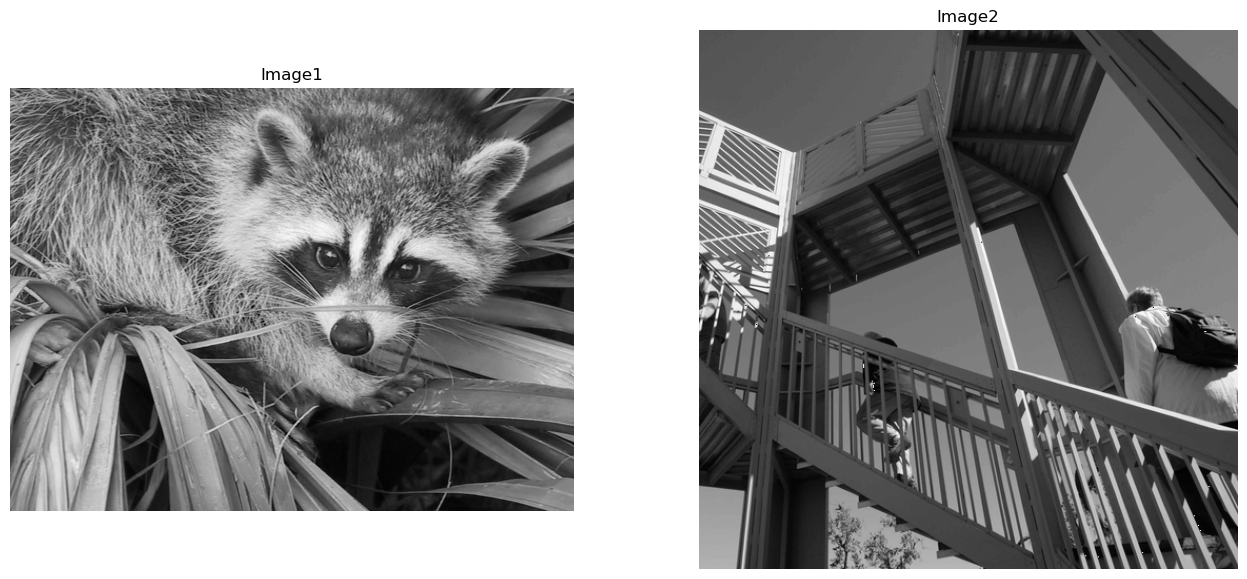

In [3]:
fig, (a1,a2) = plt.subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
im1=a1.imshow(Image1, cmap='gray', vmin=0, vmax=255)
# If vmin and vmax are not specified, imshow auto-adjusts its range, we want 0 to be black and 255 to be white
im2=a2.imshow(Image2, cmap='gray', vmin=0, vmax=255)
a1.set_title("Image1")
a2.set_title("Image2")
a1.axis('off')
a2.axis('off')
plt.show()

We see that `Image1` and `Image2` do not have the same size. The following code snippet make sure that `Image2` has the same size than `Image1`.

The size of Image3 is 768 x 1024.


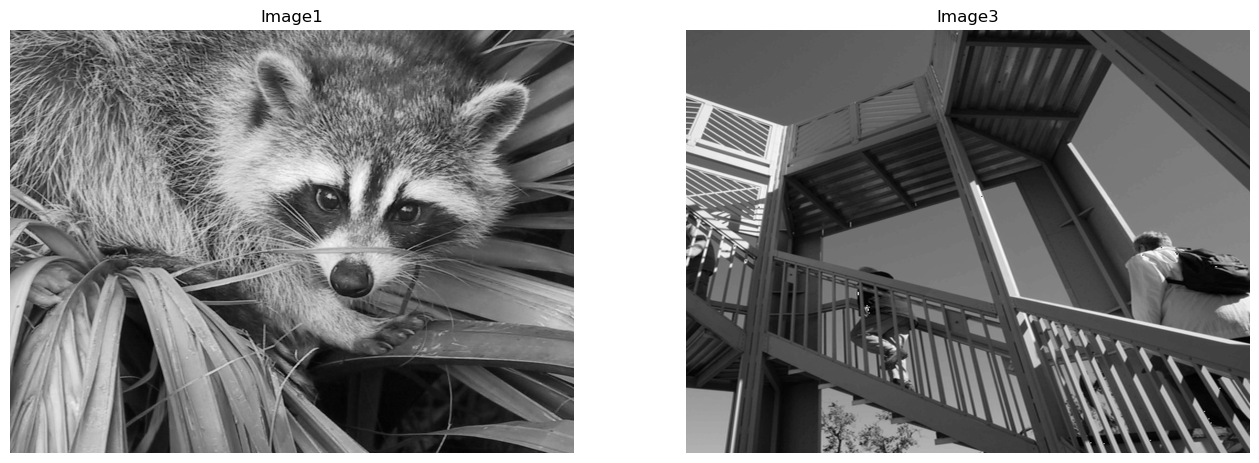

In [4]:
nx1,ny1=Image1.shape
nx2,ny2=Image2.shape
from scipy import interpolate
Interp=interpolate.RectBivariateSpline(np.linspace(0,1.,nx2),np.linspace(0,1.,ny2),Image2)
[X,Y]=np.meshgrid(np.linspace(0,1.,nx1),np.linspace(0,1.,ny1), indexing='ij')
Image3=np.reshape(Interp.ev(X.ravel(),Y.ravel()),(nx1,ny1))
print("The size of Image3 is %s x %s." % (Image3.shape[0],Image3.shape[1]))


### DISPLAYING THE IMAGES
fig, (a1,a2) = plt.subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
im1=a1.imshow(Image1, cmap='gray', vmin=0, vmax=255)
# If vmin and vmax are not specified, imshow auto-adjusts its range, we want 0 to be black and 255 to be white
im2=a2.imshow(Image3, cmap='gray', vmin=0, vmax=255)
a1.set_title("Image1")
a2.set_title("Image3")
a1.axis('off')
a2.axis('off')
plt.show()

### The scalar product
We fix $n_x=768$ and $n_y=1024$. We denote $\mathcal I$ the vector space of $2d$ matrices of size $(n_x,n_y)$. the images `Image1` and `Image3` gray scale image belongs to $\mathcal I$. On $\mathcal I$, we define the following scalar product :
$$\langle A,B\rangle_{\mathcal I}=\sum_{i=0}^{n_x-1}\sum_{j=0}^{n_y-1} A_{ij}B_{ij} $$

>**TODO** :Implement a function `scal(a,b)` that performs the scalar product of two images in $a,b\in \mathcal I$

In [5]:
def scal(a,b) :
    r = sum([a[i][j]*b[i][j] for i in range(len(a)) for j in range(len(a[0]))])
    return r

# Testing the scalar product
print("You obtain 7.65897e+09 = {:1.5e}".format(scal(Image1,Image3)))
print("You obtain 7.87672e+09 = {:1.5e}".format(scal(Image3,Image3)))
print("You obtain 1.24824e+10 = {:1.5e}".format(scal(Image1,Image1)))

You obtain 7.65897e+09 = 7.65897e+09
You obtain 7.87672e+09 = 7.87672e+09
You obtain 1.24824e+10 = 1.24824e+10


### The derivative operator

We define the 'discrete gradient' $D$, which is the linear operator which maps an image $a$ of size $(n_x,n_y)$ to two images $(b,c)$ of size respectively $(n_x-1,n_y)$ and $(n_x,n_y-1)$. 
The image $b$ contains the vertical finite differences and $c$ contains the horizontal finite differences. That is
$$ b_{i,j}=a_{i+1,j}-a_{i,j} \quad \text{ for }i=0\dots n_x-2 \text{ and } j=0\dots n_y-1$$
$$ c_{i,j}=a_{i,j+1}-a_{i,j} \quad \text{ for }i=0\dots n_x-1 \text{ and } j=0\dots n_y-2$$

And $Da=(b,c)$
>**TODO**: Define a function `D(a)` that takes in input a $(n_x,n_y)$ matrix and returns a tuple of two matrices, the first one is of size $(n_x-1,n_y)$ and the second of size $(n_x,n_y-1)$. They must be defined as above

In [6]:
def D(a) :
    a = np.array(a)
    b = a[1:,:] - a[:-1,:]
    c = a[:,1:] - a[:,:-1]
    return (b,c)
(D1,D2)=D(Image1)
print('The shape of Image1 is (768,1024)=({:d},{:d})'.format(Image1.shape[0],Image1.shape[1]))
print('The shape of    D1  is (767,1024)=({:d},{:d})'.format(D1.shape[0],D1.shape[1]))
print('The shape of    D2  is (768,1023)=({:d},{:d})'.format(D2.shape[0],D2.shape[1]))
print("You obtain 1.59792e+08 = {:1.5e}".format(scal(D1,D1)))
print("You obtain 1.08404e+08 = {:1.5e}".format(scal(D2,D2)))

The shape of Image1 is (768,1024)=(768,1024)
The shape of    D1  is (767,1024)=(767,1024)
The shape of    D2  is (768,1023)=(768,1023)
You obtain 1.59792e+08 = 1.59792e+08
You obtain 1.08404e+08 = 1.08404e+08


We display the images of the vertical or horizontal finite differences

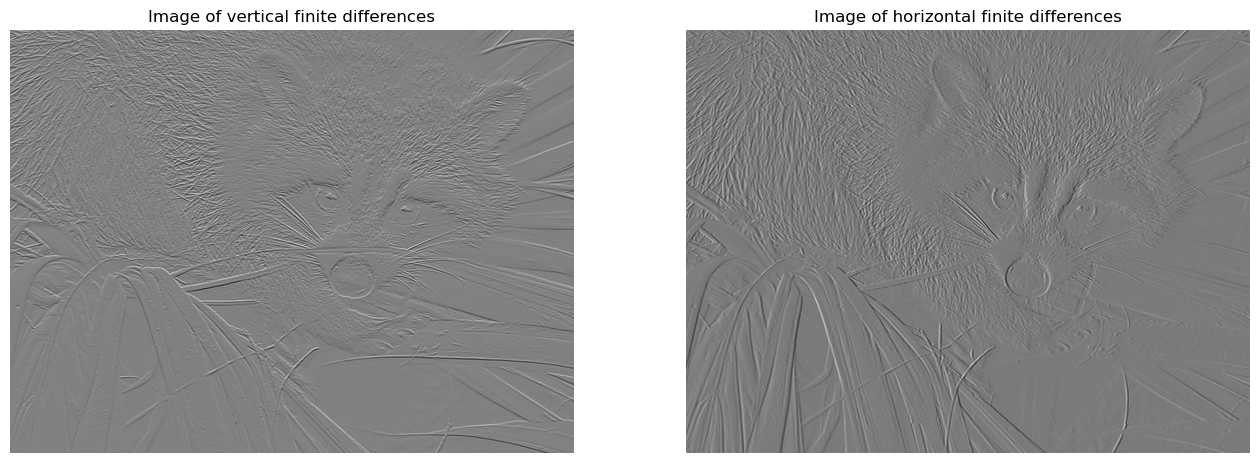

In [7]:
a=D(Image1)
fig, (a1,a2) = plt.subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
im1=a1.imshow(a[0], cmap='gray')
im2=a2.imshow(a[1], cmap='gray')
a1.set_title('Image of vertical finite differences')
a2.set_title('Image of horizontal finite differences')
a1.axis('off')
a2.axis('off')
plt.show()

### The range of D and its scalar product

The mapping `D` returns two images `D1` and `D2`, the first image is a $(n_x-1,n_y)$ image and the second image is $(n_x,n_y-1)$. We define $\mathcal I^T$ the vector space of the possible images of `D`. We have

$$\mathcal I^T=\left\{(A,B) \text{ with } A\in \mathbb{R}^{(n_x-1,n_y)},\quad B\in \mathbb{R}^{(n_x,n_y-1)} \right\}$$

We define the following scalar product on $\mathcal I^T$ defined for every $D=(A,B)$ and $C=(E,F)$ as :
$$\langle D,C\rangle_{\mathcal I^T}=\sum_{i=1}^{n_x-1}\sum_{j=1}^{n_y} A_{ij}E_{ij}+\sum_{i=1}^{n_x}\sum_{j=1}^{n_y-1} B_{ij}F_{ij}$$

>**TODO** :Implement a function `scalT(D,C)` that performs the scalar product of two elements in $D,C\in \mathcal I^T$

In [8]:
def scalT(D,C) :
    r = scal(D[0],C[0]) + scal(D[1],C[1])
    return r


a=D(Image1)
b=D(Image3)
print("You obtain 4.64759e+05 = {:1.5e}".format(scalT(a,b)))
print("You obtain 2.68197e+08 = {:1.5e}".format(scalT(a,a)))
print("You obtain 1.57914e+08 = {:1.5e}".format(scalT(b,b)))

You obtain 4.64759e+05 = 4.64759e+05
You obtain 2.68197e+08 = 2.68197e+08
You obtain 1.57914e+08 = 1.57914e+08


### The transpose of D 
We now define the transpose operator of $D$ denoted  $D^T$ it is an operator from $\mathcal I^T$ to $\mathcal I$ and is  the unique operator such that for all $a \in \mathcal I$ and $A$ in $\mathcal I^T$, we have
$$ \langle a, D^T(A) \rangle_{\mathcal I}=\langle D (a),A\rangle_{\mathcal I^T} $$ 

>**TODO** : Find the mathematical expression of $D^T$ and implement the function `DT(d)` which takes a variable $d\in \mathcal I^T$ and returns the image in  $\mathcal I$ equal to $D^Td$.


In [9]:
def DT(d) :
    dx,dy = d
    dt = np.zeros((dy.shape[0],dx.shape[1]))
    dt[1:,:] = dx
    dt[:-1,:] += -dx
    dt[:,1:] += dy
    dt[:,:-1] += -dy
    return dt
tmp=DT(D(Image3))
print("You obtain 1.57282e+08 = {:1.5e}".format(scal(tmp,tmp)))


nx=100
ny=100
np.random.seed(63)
im1=np.random.randn(nx,ny)
d1=(np.random.randn(nx-1,ny),np.random.randn(nx,ny-1))
print(scalT(d1,D(im1)),scal(im1,DT(d1))) # -210.7289649093409


You obtain 1.57282e+08 = 1.57282e+08
-210.72896490934065 -210.7289649093417


## Denoising

In the denoising problem, we suppose that we have degraded information about the original image $x^\star$: we measure
$$y=x^\star +\mbox{ noise}$$
We suppose that the images are smooth, and we estimate $x^\star$ by the solution of the problem
$$\min{x \in \mathbb{R}^d} f(x)$$
where 
$$f(x)=\frac{1}{2}\|x-y\|^2+\frac{\lambda}{2}\|Dx\|^2_{2,2},$$
and some regularization parameter $\lambda$, which depends on the noise level.

The function $f$ to minimize is smooth (it is quadratic) and we can use gradient descent. We have:
$$\nabla f(x)=x-y+\lambda D^TDx$$

We add noise to the original image $x^\star$, to simulate the noisy image $y$.

In [10]:
np.random.seed(42)
(N1,N2) = Image3.shape
noiselevel = 100
y1 = Image3 + noiselevel * np.random.randn(N1,N2)

We display the noisy image $y$.

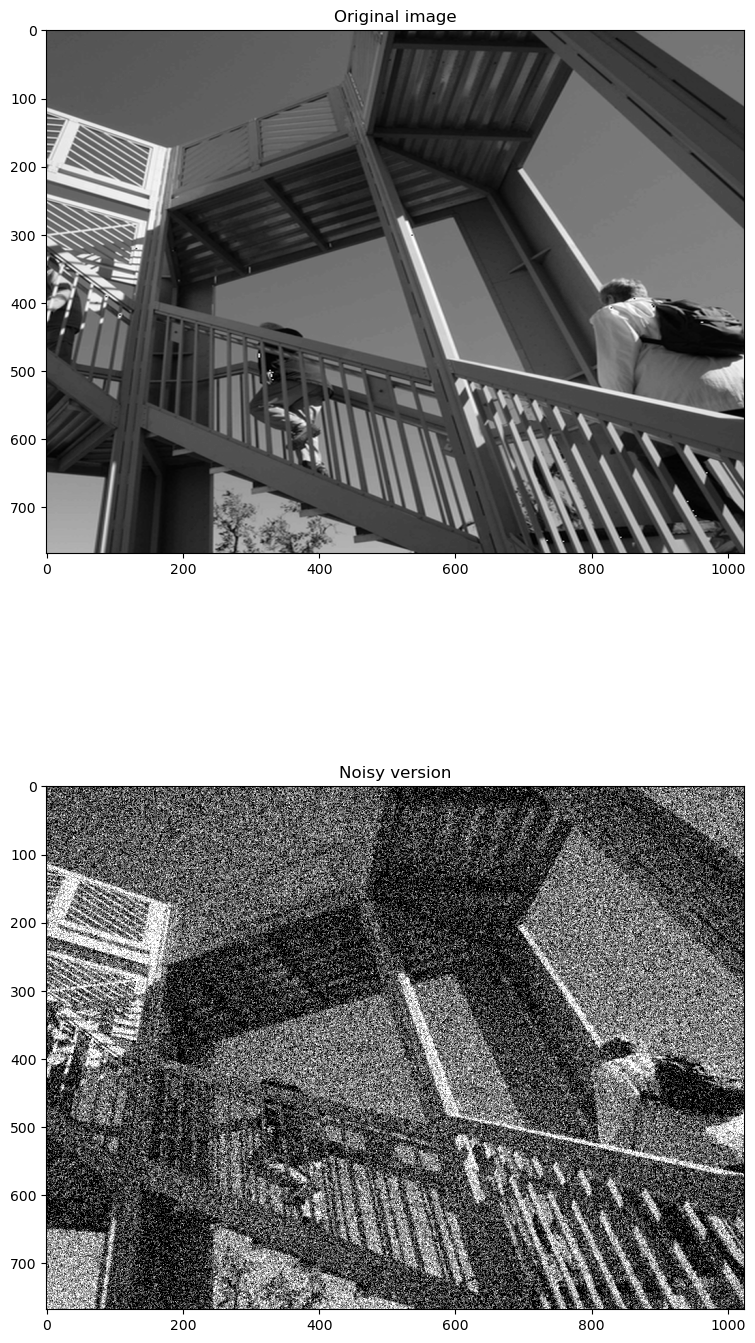

In [11]:
fig, (a1,a2) = plt.subplots(2,1,figsize=(9,18)) # one figure with two horizontal subfigures
a1.imshow(Image3, cmap='gray', vmin=0, vmax=255)
a2.imshow(y1, cmap='gray', vmin=0, vmax=255)
a1.set_title('Original image')
a2.set_title('Noisy version')
plt.show()

>**TODO** :Implement a function `Grad_and_f(x,y,lambda)` that returns a tuple `(f,grad)`, where `f` is the value of the function at point `x` and `grad` is the gradient of $f$ at point $x$.

In [12]:
def Grad_and_f1(x, y, Lambda):
    f = scal(x-y,x-y)/2 + Lambda*scalT(D(x),D(x))/2
    grad = x - y + Lambda*(DT(D(x)))
    return f,grad

f,grad=Grad_and_f1(Image3, y1, 3.5)
print("You obtain 4.21108e+09 = {:1.5e}".format(f))
print("You obtain 9.79750e+09 = {:1.5e}".format(scal(grad,grad)))
print("You obtain 5.57244e+08 = {:1.5e}".format(scal(grad,Image3)))

You obtain 4.21108e+09 = 4.21108e+09
You obtain 9.79750e+09 = 9.79750e+09
You obtain 5.57244e+08 = 5.57244e+08


We give you the Lipschitz constant $\beta$ of $\nabla f$ is $\|Id+\lambda D^*D\|=1+8\lambda$. We will perform a gradient descent with step equal to $1/(1+8\lambda)$.
>**TODO** : Implement a function GradDescent(Grad_f,y, Lambda, x0, nbiter, tau) that performs a fixed number of iterations of a gradient descent (given by `niter`) starting at `x0`, with a fixed step given by `tau` in order to retrieve an image from `y` with coefficient $\lambda$ given by `Lambda`.
The function must give as a result a dictionnary `res` in which `res['final_result']` is the final estimation of the image, `res['costs']` is an array of the costs through the iterations and `res[grads]` is an array that contains the euclidean norm of the gradients through the iterations.

In [13]:
import time
def GradDescent(Grad_and_f1,y, Lambda, x0, nbiter, tau):
    res={'costs':np.zeros(nbiter),'grads':np.zeros(nbiter),'final_result':None}
    x = x0
    for i in range(nbiter):
        f,grad = Grad_and_f1(x,y,Lambda)
        x = x - tau*grad
        res['grads'][i] = np.linalg.norm(grad)
        res['costs'][i] = f
    res['final_result'] = x
    return res

In [14]:
Lambda = 20; denoised = GradDescent(Grad_and_f1, y1, Lambda, y1, 300, 1/(1+8*Lambda))

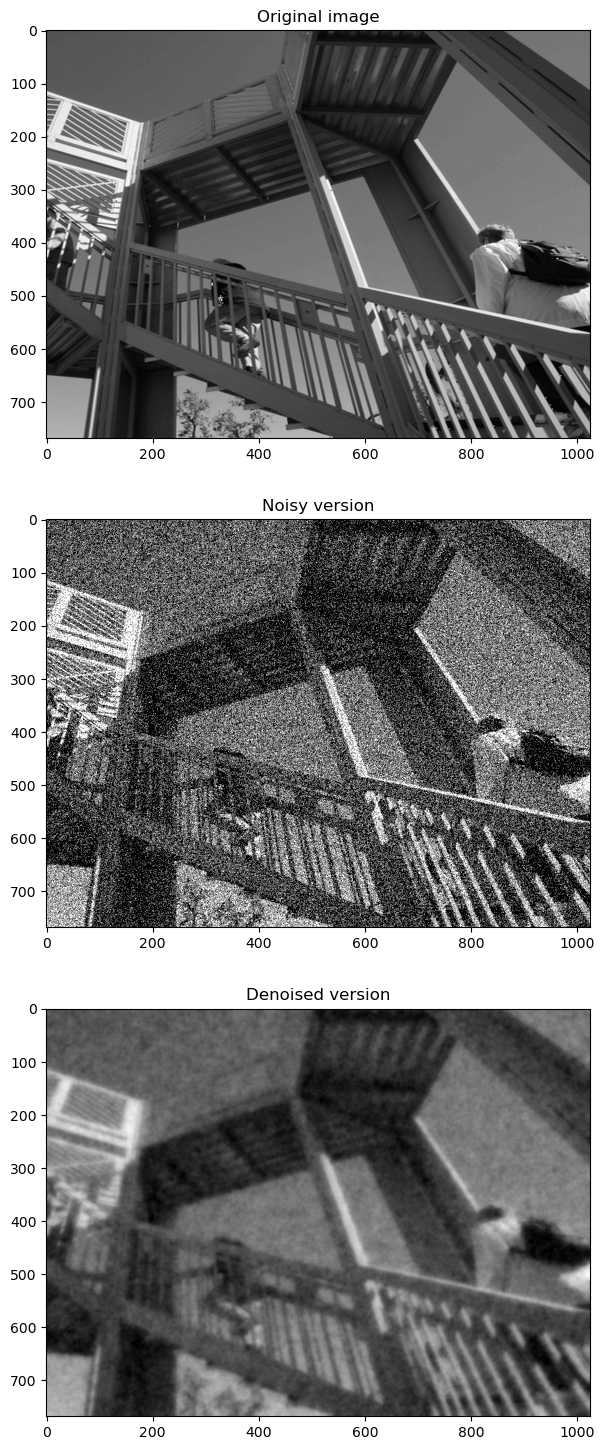

In [15]:
x=denoised['final_result']
x.shape

fig, (a1,a2,a3) = plt.subplots(3,1,figsize=(9,18)) # one figure with two horizontal subfigures
a1.imshow(Image3, cmap='gray', vmin=0, vmax=255)
a2.imshow(y1, cmap='gray', vmin=0, vmax=255)
a3.imshow(x, cmap='gray', vmin=0, vmax=255)
a1.set_title('Original image')
a2.set_title('Noisy version')
a3.set_title('Denoised version')
plt.show()

Display the convergence history of the curves of the cost and the norm of the gradient. Discuss about the convergence of the algorithm

We can note that this denoising process is linear: the denoised image $\tilde{x}$ obtained at convergence satisfies 
$$\nabla f (\tilde{x})=0\ \Leftrightarrow\ \tilde{x}=(\mathrm{Id}+\lambda D^TD)^{-1}y.$$

As a result, we can see that the noise is attenuated, but the image is blurry: its fine details have been lost. So, this denoising process has bad performances. Good denoising processes are nonlinear. We will see in the next years that using the total variation instead of Tikhonov regularization is much better.

## Image Inpainting by Projected Gradient Descent


We now consider inpainting; that is, reconstructing missing pixel values from a subset of available pixels. For that purpose, we define a boolean mask denoted by `mask` which represents the pixel that we keep. We keep about 6.7% of the pixels at random, the other ones are missing.

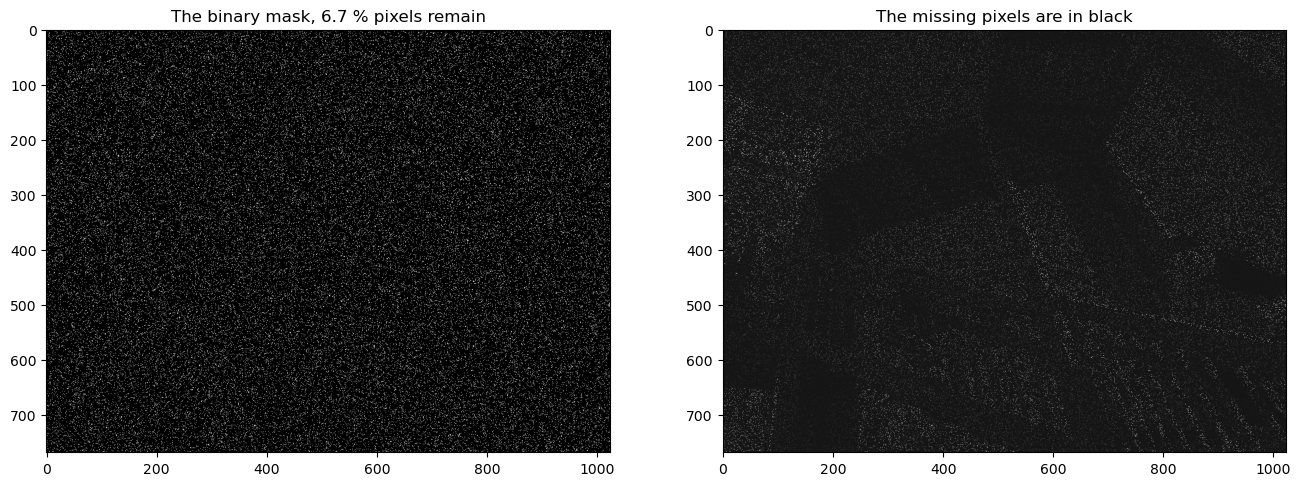

In [16]:
np.random.seed(42)
mask = np.random.randn(Image3.shape[0],Image3.shape[1])>1.5

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
ax1.imshow(mask, cmap='gray')
ax2.imshow(mask*Image3, cmap='gray')
ax1.set_title("The binary mask, {:.1f} % pixels remain".format(100*np.sum(mask.ravel())/len(mask.ravel())))
ax2.set_title('The missing pixels are in black')
plt.show()

The degradation operator $A$ is simply pixelwise multiplication by the binary mask.  We observe $y=Ax$. Prove that $A^*=A$ and $A^*A=A$.

In [17]:
y2 = mask*Image3

The problem we consider is $$\min_{x\in X} f(x)\quad\Longleftrightarrow\quad\min_{x} \frac{1}{2}\|Dx\|^2\quad\mbox{s.t.}\quad Ax=y.$$
>**TODO** :Implement a function `Grad_and_f2(x)` that returns a tuple `(f,grad)`, where `f` is the value of the function at point `x` and `grad` is the gradient of $f$ at point $x$.

In [18]:
def Grad_and_f2(x):
    return None,None

We give below the orthogonal projection of any image `z` on the set of images such that $Ax=y$

In [19]:
def Proj_X(z, y, mask):
    z[mask] = y[mask] # parameters of functions are given by reference, so the content of x can be modified
    return z

A natural extension  of gradient descent is then _projected gradient descent_, which  iteratively computes
$$ x^{(k+1)} = P_X\big(x^{(k)} - \tau \nabla f(x^{(k)})\big), $$

where $P_X$ is orthogonal projection onto $X$.

Here also, convergence of the iterates $x^{(k)}$ to a solution $x^\star$ is guaranteed, provided that $0<\tau<2/\beta$, where $\beta$ is the Lipschitz constant of the gradient of $f$. 


TODO : Implement a function `ProjGradDescent(Grad_and_f,Proj, y, mask, x0, nbiter, tau)` that performs a `niter` iterations of a projected gradient descent starting at `x0`, with a fixed step given by `tau` in order to retrieve an image from `y`. The projection operator is `Proj_Omega`. The function must give as a result a dictionnary `res` in which `res['final_result']` is the final estimation of the image, `res['costs']` is an array of the costs through the iterations and `res['grads']` is an array that contains the euclidean norm of the gradients through the iterations.

In [20]:
def ProjGradDescent(Grad_and_f, Proj, y, mask, x0, nbiter, tau):
    res={'costs':np.zeros(nbiter),'grads':np.zeros(nbiter),'final_result':None}
    return res

The Lipschitz constant $\beta$ of $\nabla f$ is 8.

In [21]:
tau = 1 / 8
nbiter = 300
restored = ProjGradDescent(Grad_and_f2, Proj_X, y2, mask, y2, nbiter, tau)

TypeError: Image data of dtype object cannot be converted to float

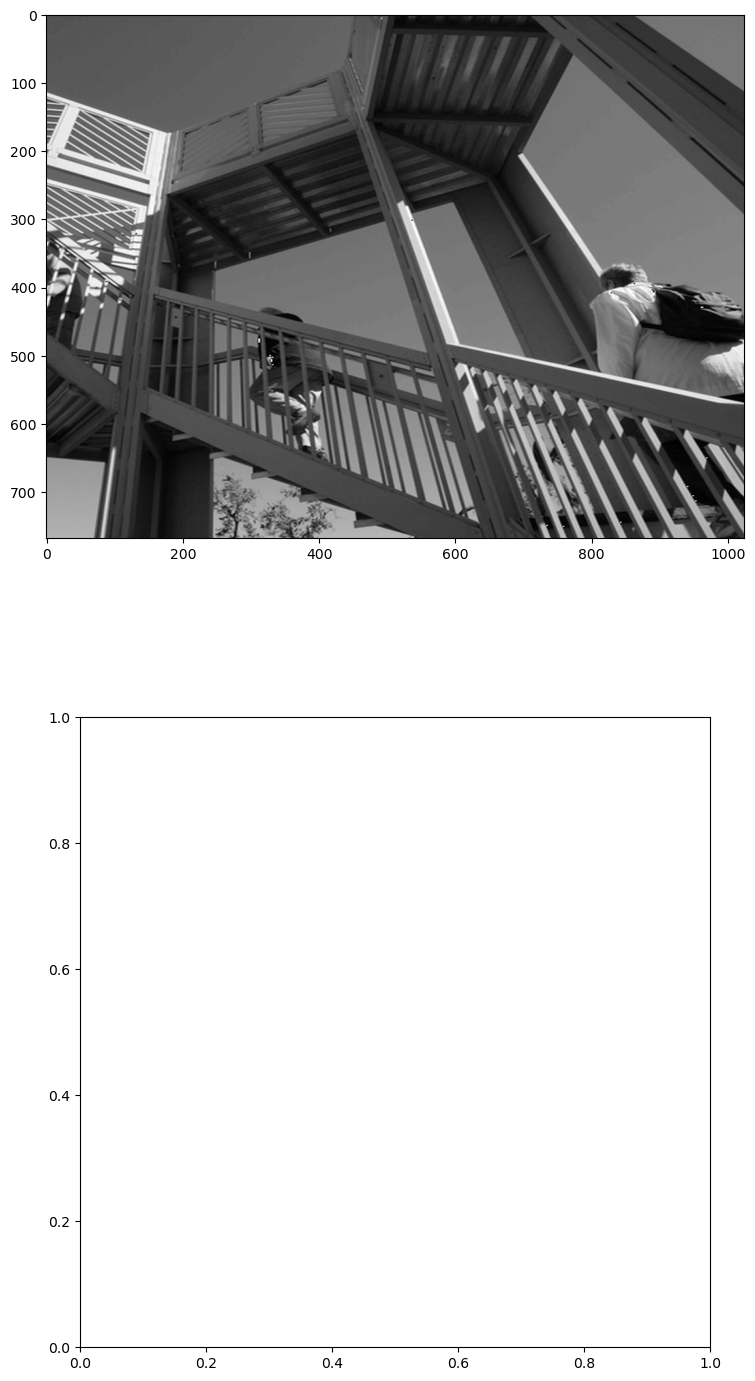

In [22]:
x=restored['final_result']
fig, (a1,a2) = plt.subplots(2,1,figsize=(9,18)) # one figure with two horizontal subfigures
a1.imshow(Image3, cmap='gray', vmin=0, vmax=255)
a2.imshow(x, cmap='gray', vmin=0, vmax=255)
a1.set_title('Original image')
a2.set_title('Reconstruction')
plt.show()

Display the convergence history of the curves of the cost and the norm of the gradient. Discuss about the convergence of the algorithm